<a href="https://colab.research.google.com/github/SamdRb/Python-Projects/blob/main/Decision_trees%2C_RForests%2C_Bagging_and_Boosting_SamDarabi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
from sklearn import tree



     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

[Text(0.4791666666666667, 0.9166666666666666, 'X[22] <= 106.05\ngini = 0.465\nsamples = 426\nvalue = [[269, 157]\n[157, 269]]'),
 Text(0.2708333333333333, 0.75, 'X[27] <= 0.159\ngini = 0.067\nsamples = 259\nvalue = [[250, 9]\n[9, 250]]'),
 Text(0.16666666666666666, 0.5833333333333334, 'X[27] <= 0.135\ngini = 0.031\nsamples = 253\nvalue = [[249, 4]\n[4, 249]]'),
 Text(0.08333333333333333, 0.4166666666666667, 'X[13] <= 48.975\ngini = 0.008\nsamples = 242\nvalue = [[241, 1]\n[1, 241]]'),
 Text(0.041666666666666664, 0.25, 'gini = 0.0\nsamples = 239\nvalue = [[239, 0]\n[0, 239]]'),
 Text(0.125, 0.25, 'X[24] <= 0.107\ngini = 0.444\nsamples = 3\nvalue = [[2, 1]\n[1, 2]]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [[2, 0]\n[0, 2]]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [[0, 1]\n[1, 0]]'),
 Text(0.25, 0.4166666666666667, 'X[1] <= 20.84\ngini = 0.397\nsamples = 11\nvalue = [[8, 3]\n[3, 8]]'),
 Text(0.208333333

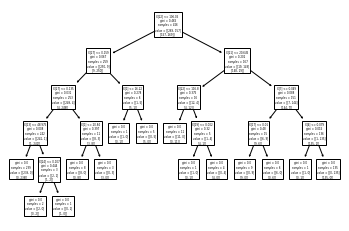

In [ ]:
# Decision Tree Classifier
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
print(X)
y = pd.Categorical.from_codes(cancer.target, cancer.target_names)
y = pd.get_dummies(y)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)
# and then plot the tree
tree.plot_tree(tree_clf) 



In [ ]:
# Random Forests and Bagging 

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
Random_Forest_model = RandomForestClassifier(n_estimators=500,criterion="entropy")
Random_Forest_model.fit(X_train_scaled, y_train)
#Cross validation
accuracy = cross_validate(Random_Forest_model,X_test_scaled,y_test,cv=10)['test_score']
print(accuracy)
print("Test set accuracy with Random Forests and scaled data: {:.2f}".format(Random_Forest_model.score(X_test_scaled,y_test)))



[1.         0.8        0.93333333 1.         1.         0.92857143
 1.         0.92857143 0.92857143 0.92857143]
Test set accuracy with Random Forests and scaled data: 0.97


In [ ]:

y_pred = Random_Forest_model.predict(X_test_scaled)

y_probas = Random_Forest_model.predict_proba(X_test_scaled)





In [ ]:
# Compare Bagging on Trees with Random Forests

from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
np.sum(y_pred == y_pred_rf) / len(y_pred) 


0.9790209790209791

(426, 30)
(143, 30)
Test set accuracy with XGBoost and scaled data: 1.00


NameError: ignored

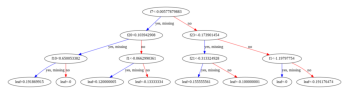

In [ ]:
# XG Boosting

import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate

import xgboost as xgb


X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
print(X_train.shape)
print(X_test.shape)

#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

xg_clf = xgb.XGBClassifier()
xg_clf.fit(X_train_scaled,y_train)

y_test = xg_clf.predict(X_test_scaled)

print("Test set accuracy with XGBoost and scaled data: {:.2f}".format(xg_clf.score(X_test_scaled,y_test)))


y_pred = xg_clf.predict(X_test_scaled)

y_probas = xg_clf.predict_proba(X_test_scaled)




xgb.plot_tree(xg_clf,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
save_fig("xgtree")
plt.show()

xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [5, 5]
save_fig("xgparams")
plt.show()



In [ ]:
# Feature Importance

from xgboost import XGBRegressor
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)

y = cancer.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)


[16:44:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
xgb.feature_importances_

array([4.0062196e-03, 1.1401865e-02, 1.3733923e-03, 1.1839021e-02,
       1.6591309e-02, 1.3783577e-02, 1.2679874e-03, 2.3788355e-02,
       9.2827639e-04, 1.4666838e-03, 8.5516982e-03, 4.5284920e-04,
       4.6823992e-04, 1.5072265e-03, 2.1639373e-04, 1.1673142e-03,
       8.7459019e-04, 2.6862169e-02, 1.1010832e-03, 1.1373502e-03,
       2.7358258e-01, 2.9249221e-02, 4.7834477e-01, 6.9692759e-03,
       6.8878173e-03, 5.0585903e-04, 7.9516647e-04, 7.3917836e-02,
       3.8094103e-04, 5.8106310e-04], dtype=float32)

<BarContainer object of 30 artists>

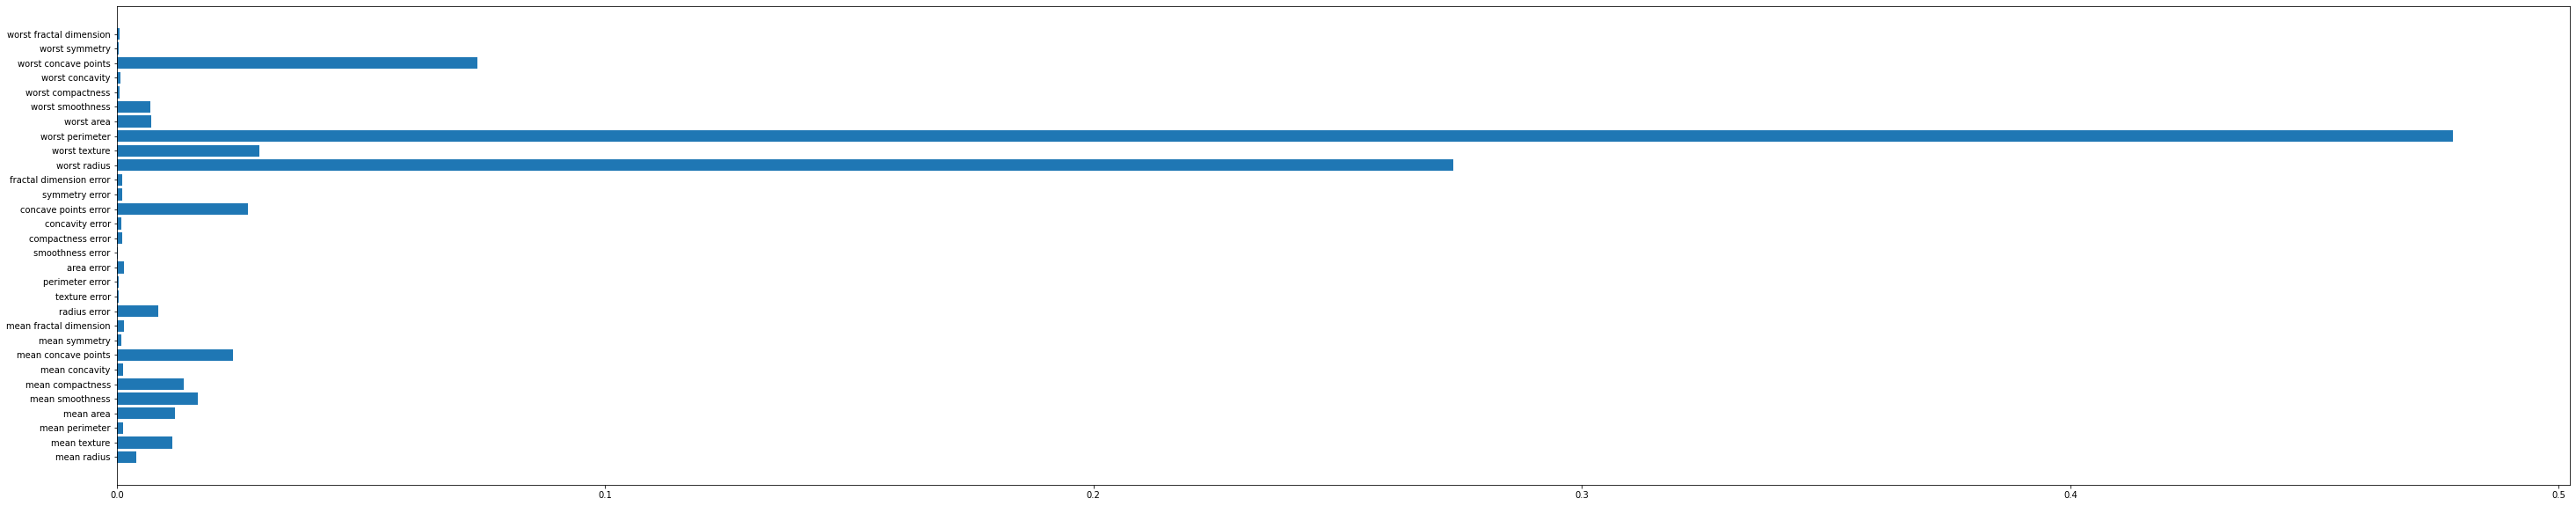

In [ ]:
plt.barh(cancer.feature_names, xgb.feature_importances_)

Text(0.5, 0, 'Xgboost Feature Importance')

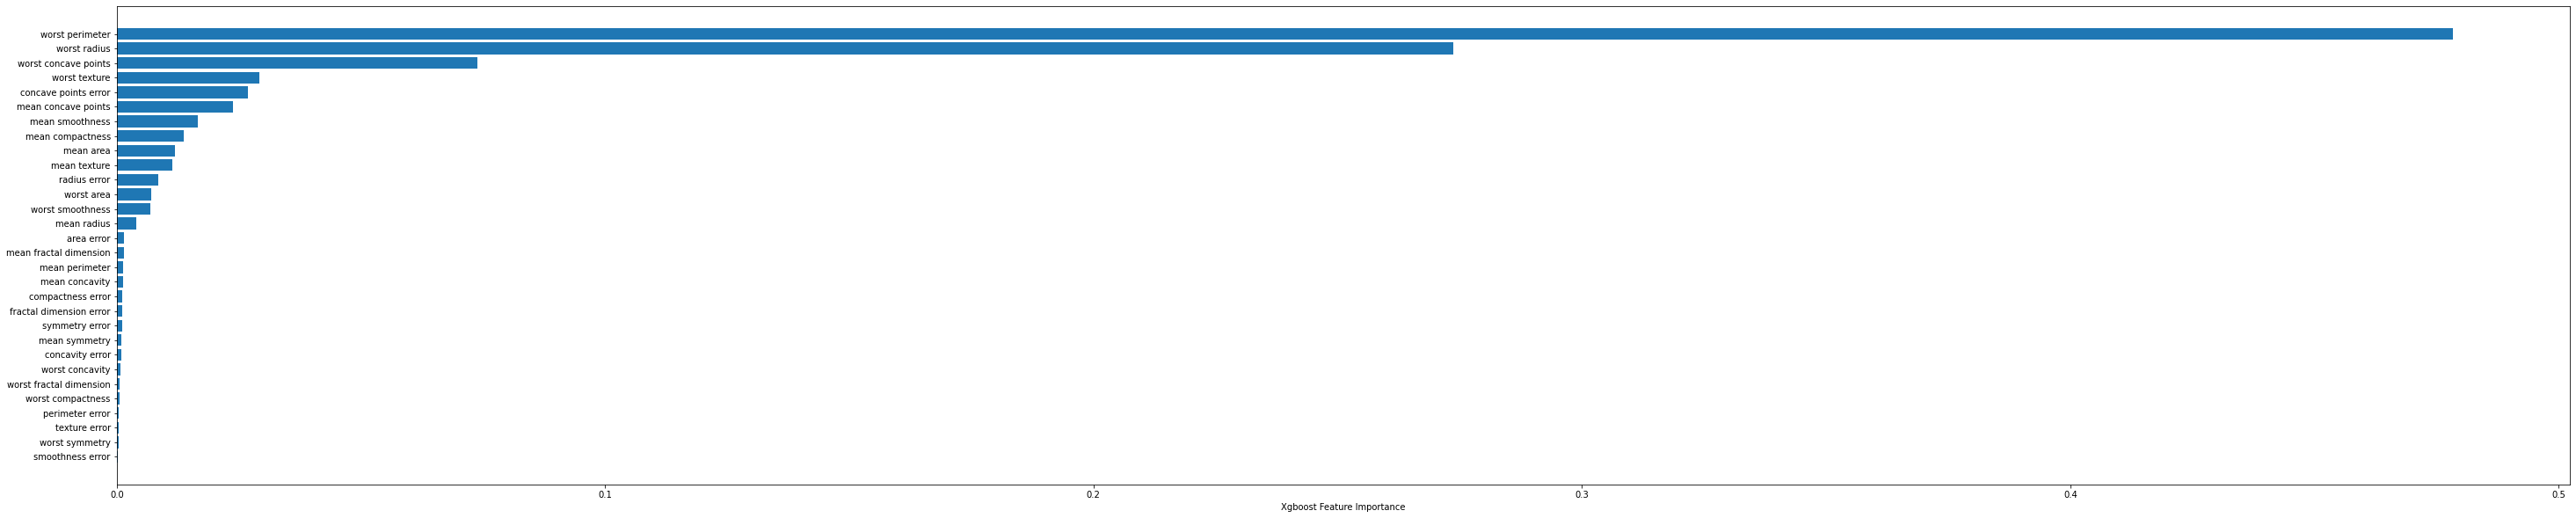

In [ ]:
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(cancer.feature_names[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [ ]:
pip install shap


     |████████████████████████████████| 564 kB 4.5 MB/s 


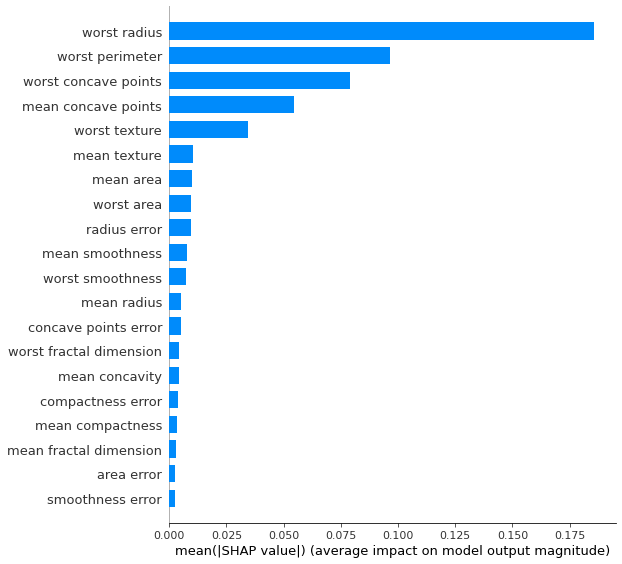

In [ ]:
# Feature Importance Computed with SHAP Values

import shap
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
